In [70]:
from Bio import SeqIO
import subprocess, shlex
import sys
sys.path.append('./src/')
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
import smallpars
import glob

In [72]:
folders = ['./examples/ORCO_Chemoreceptors/' , './examples/sas6/round2/sp_sas6/' , './examples/RRNPP/round2/all/' ]
folders += glob.glob('./examples/fsx1/*/')
print(folders)

['./examples/ORCO_Chemoreceptors/', './examples/sas6/round2/sp_sas6/', './examples/RRNPP/round2/all/', './examples/fsx1/2/', './examples/fsx1/48/', './examples/fsx1/14/', './examples/fsx1/9/', './examples/fsx1/28/', './examples/fsx1/44/', './examples/fsx1/7/', './examples/fsx1/8/', './examples/fsx1/50/', './examples/fsx1/34/', './examples/fsx1/27/', './examples/fsx1/39/', './examples/fsx1/38/', './examples/fsx1/26/', './examples/fsx1/30/', './examples/fsx1/1/', './examples/fsx1/17/', './examples/fsx1/43/', './examples/fsx1/42/', './examples/fsx1/22/', './examples/fsx1/25/', './examples/fsx1/20/', './examples/fsx1/5/', './examples/fsx1/32/', './examples/fsx1/40/', './examples/fsx1/15/', './examples/fsx1/21/', './examples/fsx1/23/', './examples/fsx1/13/', './examples/fsx1/10/', './examples/fsx1/31/', './examples/fsx1/6/', './examples/fsx1/51/', './examples/fsx1/41/', './examples/fsx1/11/', './examples/fsx1/18/', './examples/fsx1/0/', './examples/fsx1/24/', './examples/fsx1/37/', './examp

./examples/ORCO_Chemoreceptors/
Index(['Unnamed: 0', 'Entry Name', 'Entry', 'Gene Names', 'Protein names',
       'Reviewed', 'Protein names.1', 'Organism', 'Taxonomic lineage (Ids)',
       'Sequence', 'query'],
      dtype='object')
0       2015172 (genus), 213859 (subfamily), 36668 (fa...
1       604375 (genus), 141711 (tribe), 43085 (subfami...
2       32351 (no rank), 32346 (no rank), 32341 (subge...
3       32351 (no rank), 32346 (no rank), 32341 (subge...
4       32351 (no rank), 32346 (no rank), 32341 (subge...
                              ...                        
1425    32351 (no rank), 32346 (no rank), 32341 (subge...
1426    32351 (no rank), 32346 (no rank), 32341 (subge...
1427    32351 (no rank), 32346 (no rank), 32341 (subge...
1428    32351 (no rank), 32346 (no rank), 32341 (subge...
1429    32351 (no rank), 32346 (no rank), 32341 (subge...
Name: Taxonomic lineage (Ids), Length: 1430, dtype: object
0       { 131567 (no rank), 2015172 (genus),  6960 (su...
1       { 

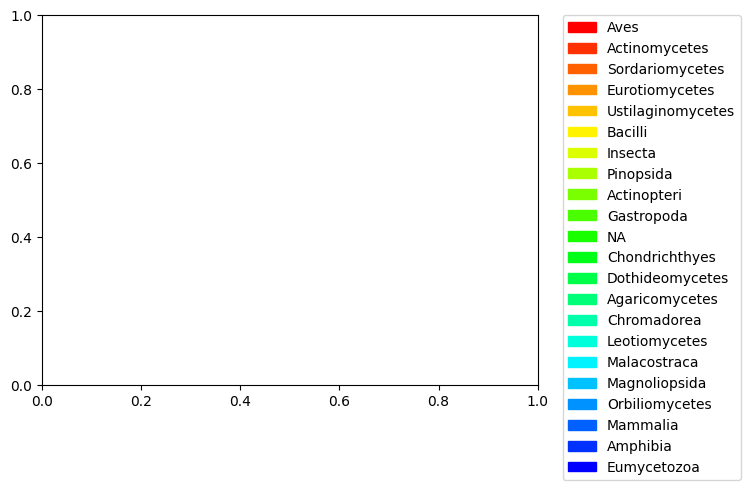

./examples/sas6/round2/sp_sas6/
Index(['Unnamed: 0', 'Entry Name', 'Entry', 'Gene Names', 'Protein names',
       'Reviewed', 'Protein names.1', 'Organism', 'Taxonomic lineage (Ids)',
       'Sequence', 'query'],
      dtype='object')
0     3701 (genus), 980083 (tribe), 3700 (family), 3...
1     3701 (genus), 980083 (tribe), 3700 (family), 3...
2     862507 (subgenus), 10088 (genus), 39107 (subfa...
3     6237 (genus), 55885 (subfamily), 6243 (family)...
4     9605 (genus), 207598 (subfamily), 9604 (family...
                            ...                        
59    4530 (species), 4527 (genus), 1648021 (subtrib...
60    9030 (genus), 9072 (subfamily), 9005 (family),...
61    262014 (subgenus), 8353 (genus), 8360 (subfami...
62    9605 (genus), 207598 (subfamily), 9604 (family...
63    862507 (subgenus), 10088 (genus), 39107 (subfa...
Name: Taxonomic lineage (Ids), Length: 64, dtype: object
0     { 58023 (no rank),  71275 (no rank),  78536 (n...
1     { 58023 (no rank),  71275 (no 

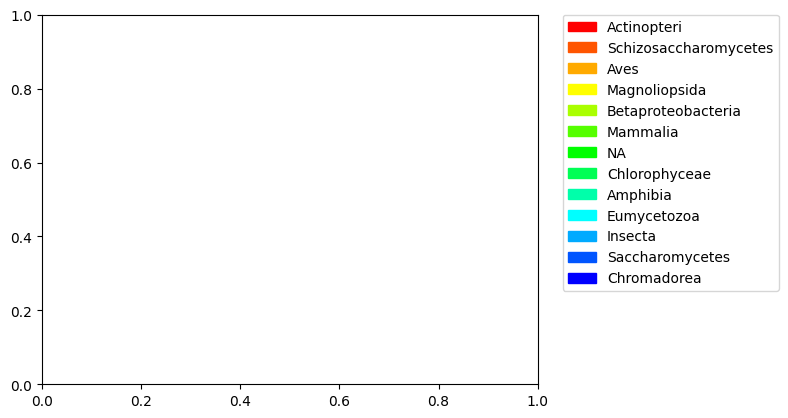

./examples/RRNPP/round2/all/
Index(['Unnamed: 0', 'Entry Name', 'Entry', 'Gene Names', 'Protein names',
       'Reviewed', 'Protein names.1', 'Organism', 'Taxonomic lineage (Ids)',
       'Sequence', 'query'],
      dtype='object')
0      300825 (species), 2675234 (genus), 186817 (fam...
1      300825 (species), 2675234 (genus), 186817 (fam...
2      300825 (species), 2675234 (genus), 186817 (fam...
3      300825 (species), 2675234 (genus), 186817 (fam...
4      300825 (species), 2675234 (genus), 186817 (fam...
                             ...                        
822    79880 (species), 2675234 (genus), 186817 (fami...
823    79880 (species), 2675234 (genus), 186817 (fami...
824    1351 (species), 1350 (genus), 81852 (family), ...
825    142877 (species), 36853 (genus), 2937909 (fami...
826    2843792 (species), 2843363 (genus), 2731619 (c...
Name: Taxonomic lineage (Ids), Length: 827, dtype: object
0      { 1385 (order),  1783272 (no rank),  2675234 (...
1      { 1385 (order),  17

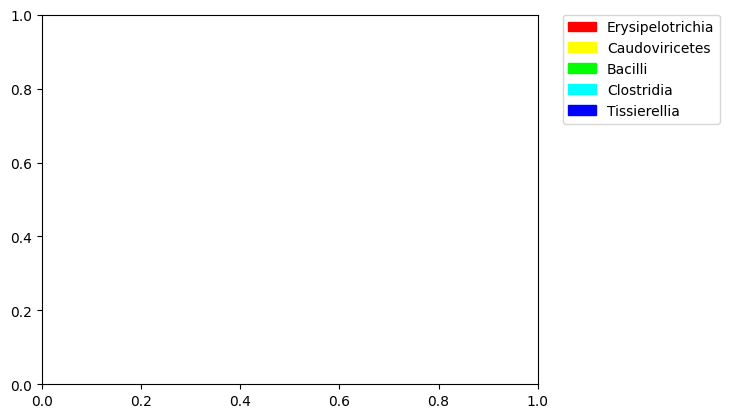

./examples/fsx1/2/
Index(['Unnamed: 0', 'Entry Name', 'Entry', 'Gene Names', 'Protein names',
       'Reviewed', 'Protein names.1', 'Organism', 'Taxonomic lineage (Ids)',
       'Sequence', 'query'],
      dtype='object')
0      5890 (genus), 291294 (family), 37093 (suborder...
1      3052 (genus), 3051 (family), 3042 (order), 281...
2      3701 (genus), 980083 (tribe), 3700 (family), 3...
3      862507 (subgenus), 10088 (genus), 39107 (subfa...
4      9605 (genus), 207598 (subfamily), 9604 (family...
                             ...                        
550    671232 (no rank), 1301 (genus), 1300 (family),...
551    2371 (species), 2370 (genus), 32033 (family), ...
552    2234 (species), 2233 (genus), 2232 (family), 2...
553    2190 (species), 196118 (genus), 196117 (family...
554    2190 (species), 196118 (genus), 196117 (family...
Name: Taxonomic lineage (Ids), Length: 555, dtype: object
0      { 431838 (subphylum), 5890 (genus),  37093 (su...
1      { 33090 (kingdom),  3051 (fam

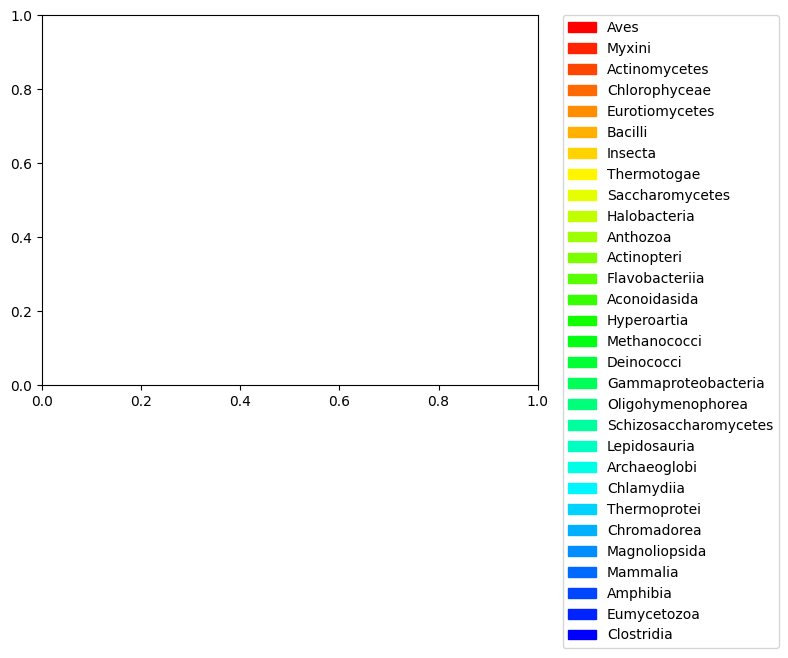

./examples/fsx1/48/
Index(['Unnamed: 0', 'Entry Name', 'Entry', 'Gene Names', 'Protein names',
       'Reviewed', 'Protein names.1', 'Organism', 'Taxonomic lineage (Ids)',
       'Sequence', 'query'],
      dtype='object')
0       817 (species), 816 (genus), 815 (family), 1715...
1       817 (species), 816 (genus), 815 (family), 1715...
2       1970191 (genus), 1970190 (family), 171549 (ord...
3       629 (genus), 1903411 (family), 91347 (order), ...
4       136843 (no rank), 286 (genus), 135621 (family)...
                              ...                        
3743    432329 (species), 1298 (genus), 183710 (family...
3744    370885 (subspecies), 863 (species), 862 (genus...
3745    454171 (species), 1077265 (genus), 1077264 (fa...
3746    288795 (species), 34416 (genus), 55071 (family...
3747    2685734 (no rank), 1182780 (genus), 2844866 (f...
Name: Taxonomic lineage (Ids), Length: 3748, dtype: object
0       {817 (species),  200643 (class),  816 (genus),...
1       {817 (species)

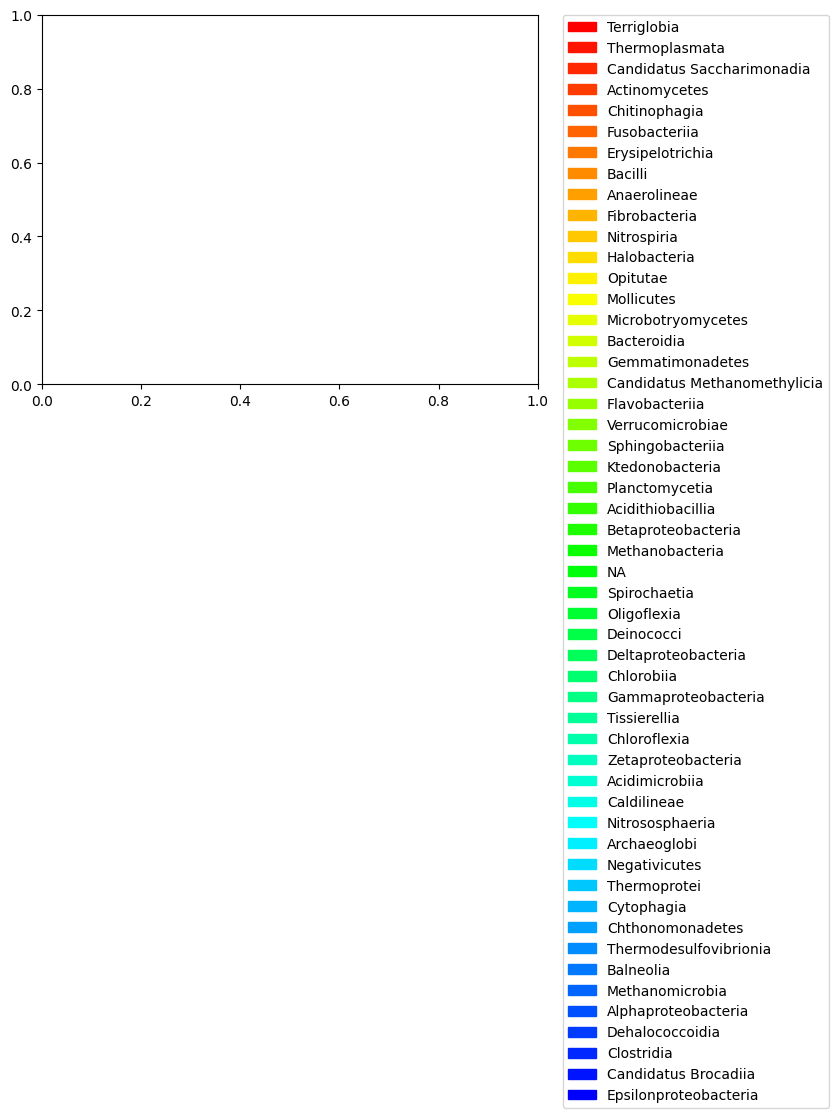

./examples/fsx1/14/
Index(['Unnamed: 0', 'Entry Name', 'Entry', 'Gene Names', 'Protein names',
       'Reviewed', 'Protein names.1', 'Organism', 'Taxonomic lineage (Ids)',
       'Sequence', 'query'],
      dtype='object')
0      6237 (genus), 55885 (subfamily), 6243 (family)...
1      4896 (species), 4895 (genus), 4894 (family), 3...
2      262014 (subgenus), 8353 (genus), 8360 (subfami...
3      9605 (genus), 207598 (subfamily), 9604 (family...
4      562 (species), 561 (genus), 543 (family), 9134...
                             ...                        
518    29471 (species), 122277 (genus), 1903410 (fami...
519    620 (genus), 543 (family), 91347 (order), 1236...
520    59201 (subspecies), 28901 (species), 590 (genu...
521    90371 (no rank), 59201 (subspecies), 28901 (sp...
522    686 (no rank), 127906 (no rank), 666 (species)...
Name: Taxonomic lineage (Ids), Length: 523, dtype: object
0      { 6072 (no rank),  2301119 (infraorder),  6236...
1      { 451864 (subkingdom),  4518

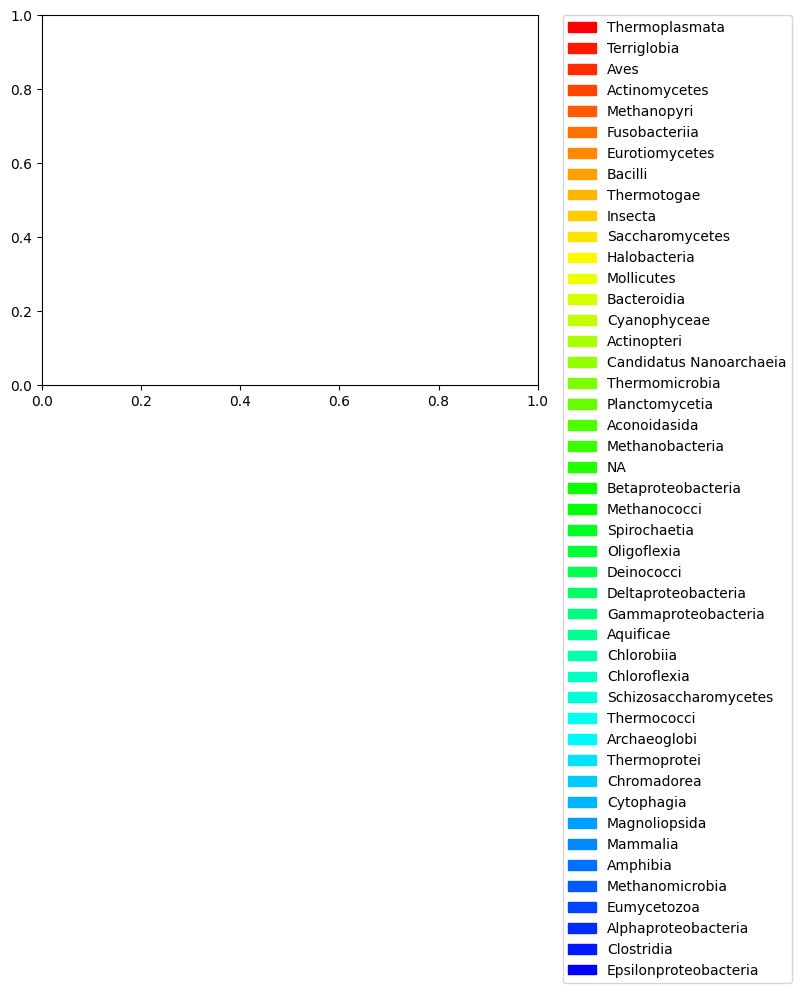

./examples/fsx1/9/
Index(['Unnamed: 0', 'Entry Name', 'Entry', 'Gene Names', 'Protein names',
       'Reviewed', 'Protein names.1', 'Organism', 'Taxonomic lineage (Ids)',
       'Sequence', 'query'],
      dtype='object')
0      9903 (genus), 27592 (subfamily), 9895 (family)...
1      196159 (no rank), 13687 (genus), 41297 (family...
2      10114 (genus), 39107 (subfamily), 10066 (famil...
3      9903 (genus), 27592 (subfamily), 9895 (family)...
4      9605 (genus), 207598 (subfamily), 9604 (family...
                             ...                        
355    818 (species), 816 (genus), 815 (family), 1715...
356    818 (species), 816 (genus), 815 (family), 1715...
357    111955 (species), 69655 (genus), 118883 (famil...
358    4896 (species), 4895 (genus), 4894 (family), 3...
359    727 (species), 724 (genus), 712 (family), 1356...
Name: Taxonomic lineage (Ids), Length: 360, dtype: object
0      { 131567 (no rank),  117570 (no rank),  7711 (...
1      { 204457 (order),  13687 (gen

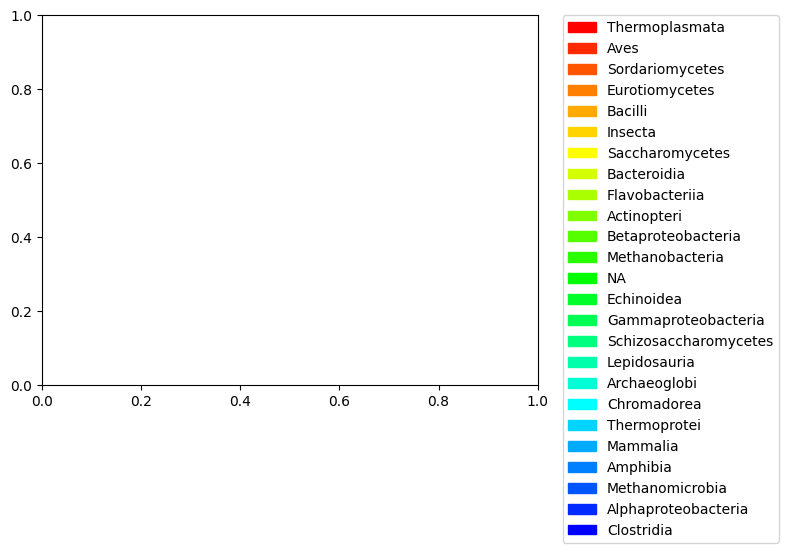

./examples/fsx1/28/
Index(['Unnamed: 0', 'Entry Name', 'Entry', 'Gene Names', 'Protein names',
       'Reviewed', 'Protein names.1', 'Organism', 'Taxonomic lineage (Ids)',
       'Sequence', 'query'],
      dtype='object')
0      28099 (species), 357 (genus), 227290 (no rank)...
1      2208 (species), 2207 (genus), 2206 (family), 9...
2      1295327 (genus), 335929 (family), 204457 (orde...
3      1866885 (genus), 1762 (family), 85007 (order),...
4      1685036 (no rank), 928852 (phylum), 1783275 (n...
                             ...                        
232    165 (species), 157 (genus), 2845253 (family), ...
233    821 (species), 909656 (genus), 815 (family), 1...
234    2637378 (no rank), 970 (genus), 1843491 (famil...
235    147266 (species), 357 (genus), 227290 (no rank...
236    85558 (species), 1883 (genus), 2062 (family), ...
Name: Taxonomic lineage (Ids), Length: 237, dtype: object
0      { 356 (order),  1224 (phylum),  131567 (no ran...
1      { 2157 (superkingdom),  1315

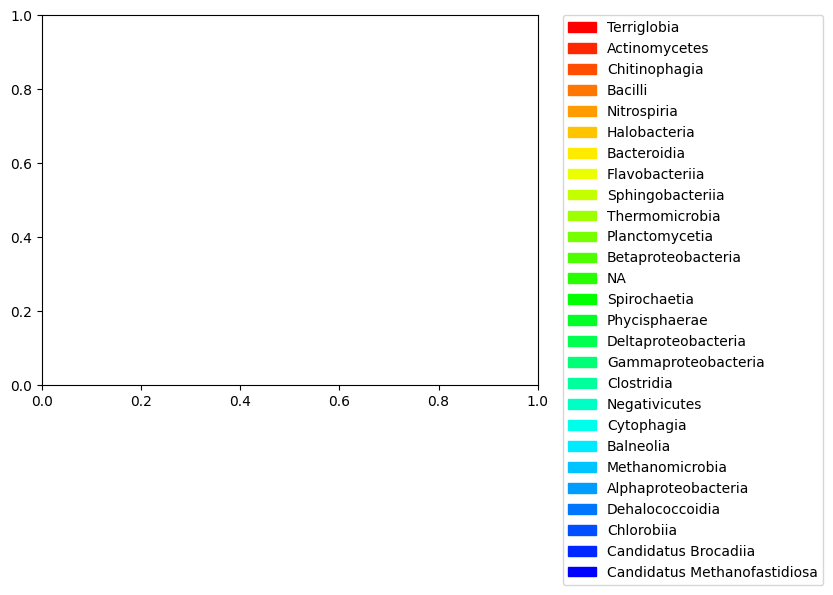

./examples/fsx1/44/
Index(['Unnamed: 0', 'Entry Name', 'Entry', 'Gene Names', 'Protein names',
       'Reviewed', 'Protein names.1', 'Organism', 'Taxonomic lineage (Ids)',
       'Sequence', 'query'],
      dtype='object')
0       185978 (no rank), 44249 (genus), 186822 (famil...
1       1372 (genus), 186818 (family), 1385 (order), 9...
2       2675229 (genus), 186817 (family), 1385 (order)...
3       185979 (no rank), 1386 (genus), 186817 (family...
4       1428 (species), 86661 (no rank), 1386 (genus),...
                              ...                        
2975    29447 (species), 338 (genus), 32033 (family), ...
2976    47055 (species), 47054 (genus), 649777 (family...
2977    1308 (species), 1301 (genus), 1300 (family), 1...
2978    36873 (species), 1822464 (genus), 119060 (fami...
2979    28037 (species), 1301 (genus), 1300 (family), ...
Name: Taxonomic lineage (Ids), Length: 2980, dtype: object
0       {185978 (no rank),  1385 (order),  1783272 (no...
1       { 1385 (order)

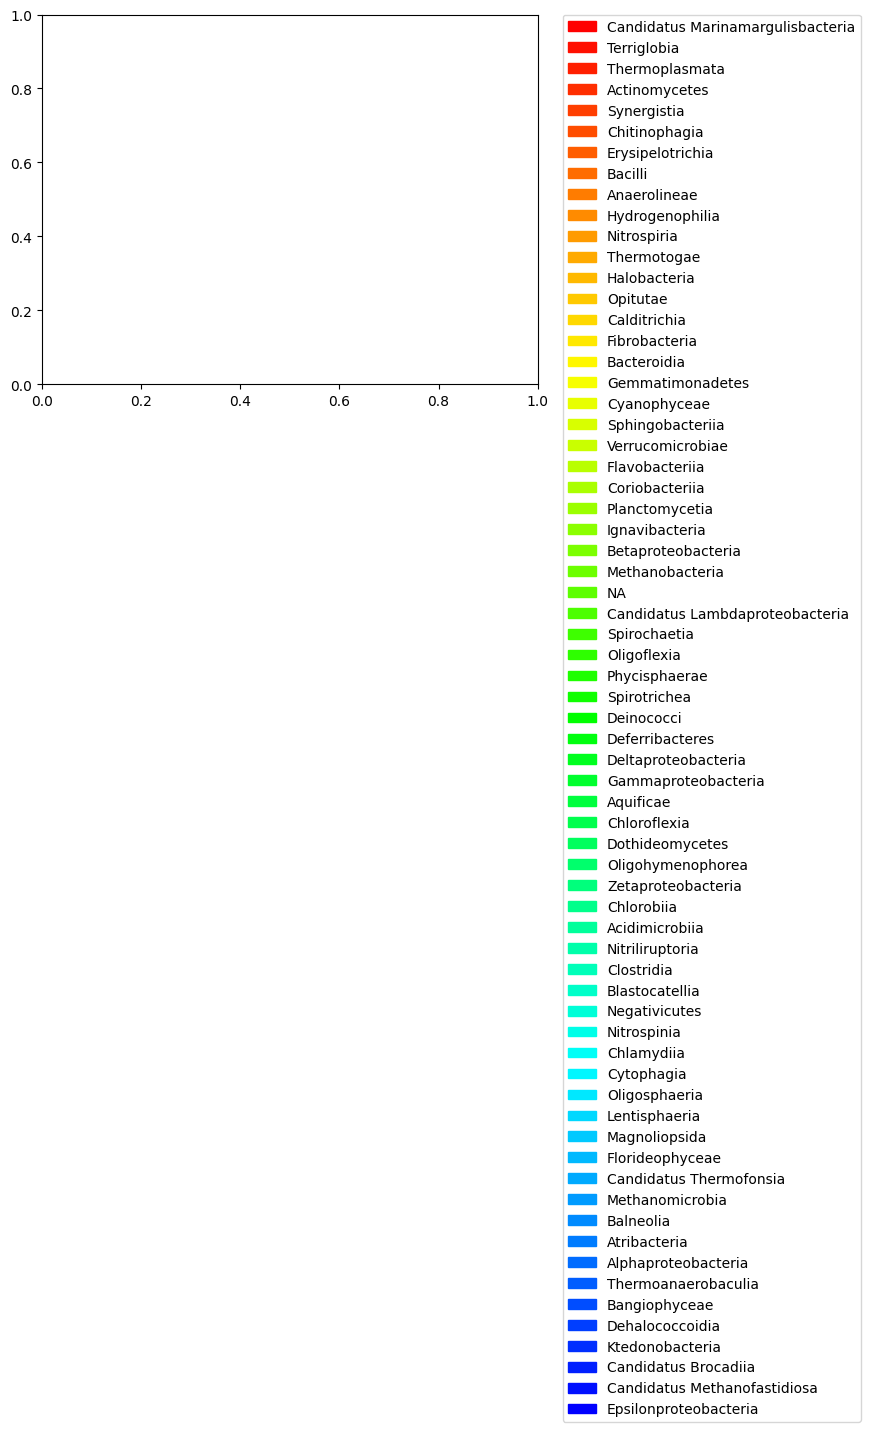

./examples/fsx1/7/
Index(['Unnamed: 0', 'Entry Name', 'Entry', 'Gene Names', 'Protein names',
       'Reviewed', 'Protein names.1', 'Organism', 'Taxonomic lineage (Ids)',
       'Sequence', 'query'],
      dtype='object')
0       3701 (genus), 980083 (tribe), 3700 (family), 3...
1       8363 (subgenus), 8353 (genus), 8360 (subfamily...
2       10114 (genus), 39107 (subfamily), 10066 (famil...
3       7954 (genus), 2743711 (subfamily), 2743709 (fa...
4       3701 (genus), 980083 (tribe), 3700 (family), 3...
                              ...                        
7111    380021 (species), 136843 (no rank), 286 (genus...
7112    664662 (subspecies), 29519 (species), 64895 (g...
7113    633 (species), 1649845 (no rank), 629 (genus),...
7114    672 (species), 662 (genus), 641 (family), 1356...
7115    1649845 (no rank), 629 (genus), 1903411 (famil...
Name: Taxonomic lineage (Ids), Length: 7116, dtype: object
0       { 58023 (no rank),  71275 (no rank),  78536 (n...
1       { 8353 (genus),

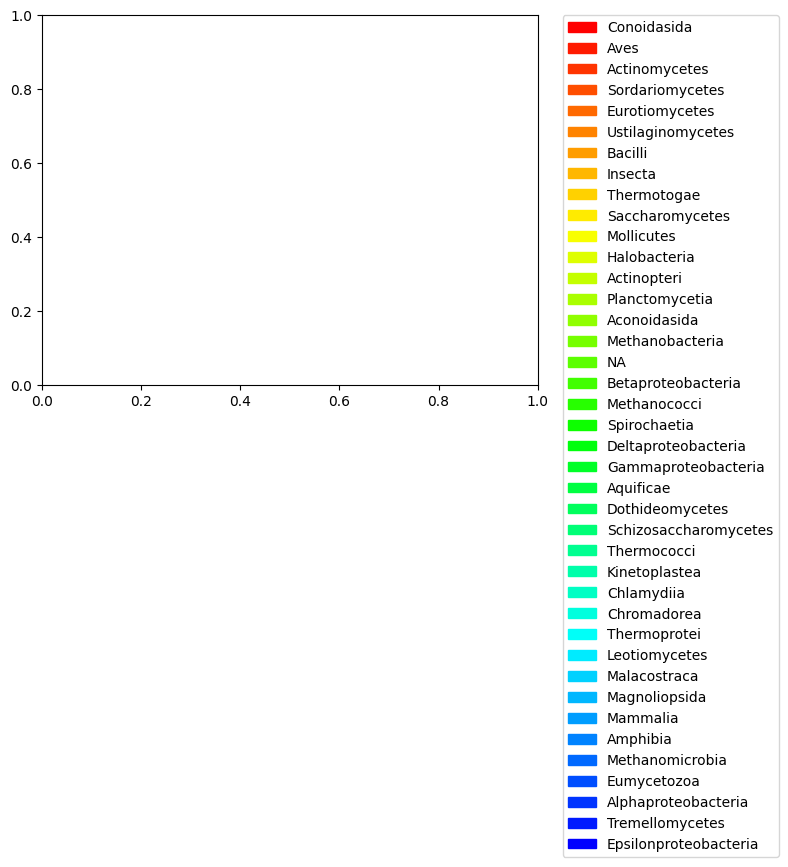

./examples/fsx1/8/
Index(['Unnamed: 0', 'Entry Name', 'Entry', 'Gene Names', 'Protein names',
       'Reviewed', 'Protein names.1', 'Organism', 'Taxonomic lineage (Ids)',
       'Sequence', 'query'],
      dtype='object')
0       562 (species), 561 (genus), 543 (family), 9134...
1       562 (species), 561 (genus), 543 (family), 9134...
2       562 (species), 561 (genus), 543 (family), 9134...
3       2817139 (genus), 186817 (family), 1385 (order)...
4       562 (species), 561 (genus), 543 (family), 9134...
                              ...                        
2759    1280 (species), 1279 (genus), 90964 (family), ...
2760    37329 (species), 1817 (genus), 85025 (family),...
2761    1280 (species), 1279 (genus), 90964 (family), ...
2762    670 (species), 717610 (no rank), 662 (genus), ...
2763    1773 (species), 77643 (no rank), 1763 (genus),...
Name: Taxonomic lineage (Ids), Length: 2764, dtype: object
0       { 543 (family),  91347 (order), 562 (species),...
1       { 543 (family),

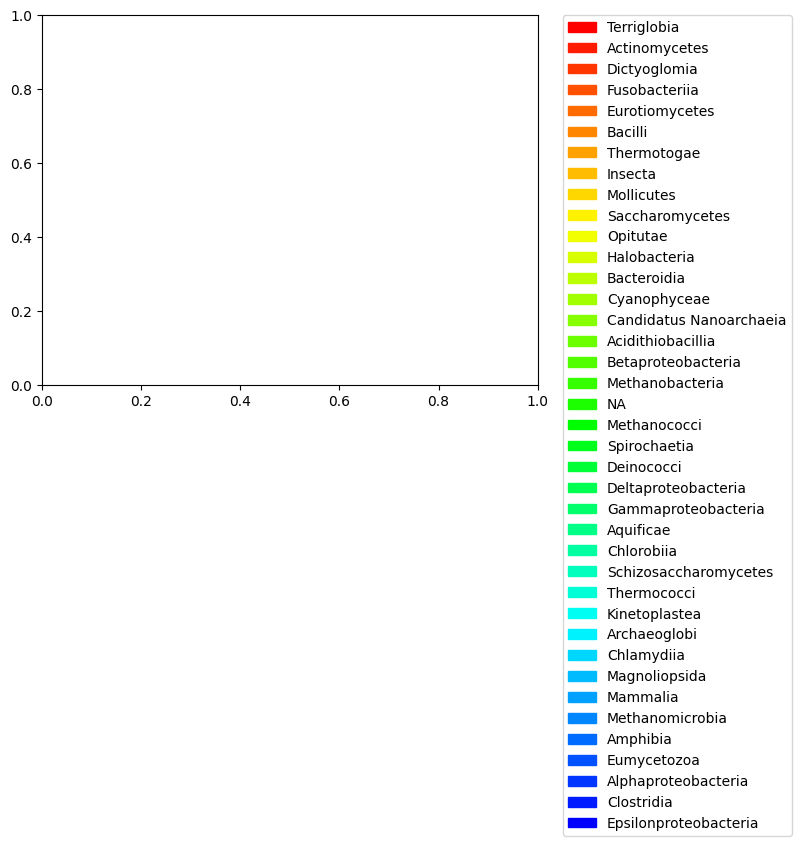

./examples/fsx1/50/
Index(['Unnamed: 0', 'Entry Name', 'Entry', 'Gene Names', 'Protein names',
       'Reviewed', 'Protein names.1', 'Organism', 'Taxonomic lineage (Ids)',
       'Sequence', 'query'],
      dtype='object')
0       188 (species), 13134 (genus), 41295 (family), ...
1       2613769 (no rank), 379 (genus), 227290 (no ran...
2       1046984 (no rank), 221216 (phylum), 1794811 (n...
3       1704022 (no rank), 203693 (class), 40117 (phyl...
4       1081798 (no rank), 292625 (class), 200795 (phy...
                              ...                        
2999    1866885 (genus), 1762 (family), 85007 (order),...
3000    52018 (no rank), 1760 (class), 201174 (phylum)...
3001    40988 (species), 1851 (genus), 2070 (family), ...
3002    208441 (species), 1813 (genus), 2070 (family),...
3003    208444 (species), 1813 (genus), 2070 (family),...
Name: Taxonomic lineage (Ids), Length: 3004, dtype: object
0       { 1224 (phylum),  131567 (no rank),  41295 (fa...
1       { 379 (genus),

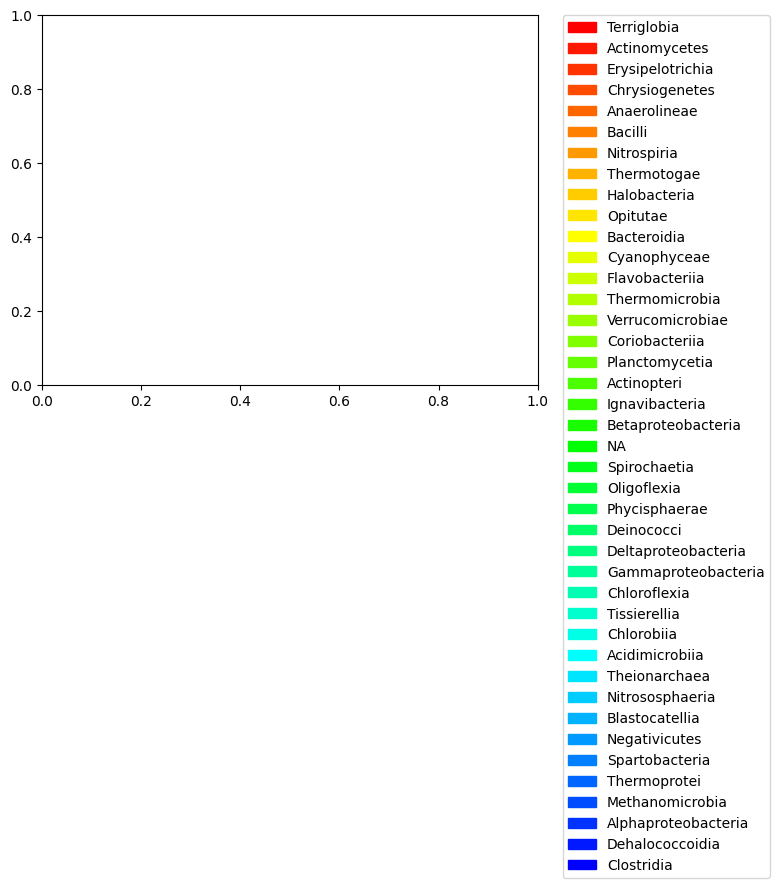

./examples/fsx1/34/
Index(['Unnamed: 0', 'Entry Name', 'Entry', 'Gene Names', 'Protein names',
       'Reviewed', 'Protein names.1', 'Organism', 'Taxonomic lineage (Ids)',
       'Sequence', 'query'],
      dtype='object')
0      213495 (no rank), 29 (order), 28221 (class), 6...
1      2511820 (no rank), 2232 (family), 2231 (order)...
2      2629519 (no rank), 12914 (genus), 118883 (fami...
3      2749910 (genus), 2749909 (family), 33838 (orde...
4      1485 (genus), 31979 (family), 186802 (order), ...
                             ...                        
328    1492 (species), 1485 (genus), 31979 (family), ...
329    1335640 (no rank), 36745 (species), 1485 (genu...
330    1335640 (no rank), 36745 (species), 1485 (genu...
331    397865 (species), 397864 (genus), 2005519 (fam...
332    1492 (species), 1485 (genus), 31979 (family), ...
Name: Taxonomic lineage (Ids), Length: 333, dtype: object
0      {213495 (no rank),  1224 (phylum),  131567 (no...
1      { 2231 (order),  2157 (super

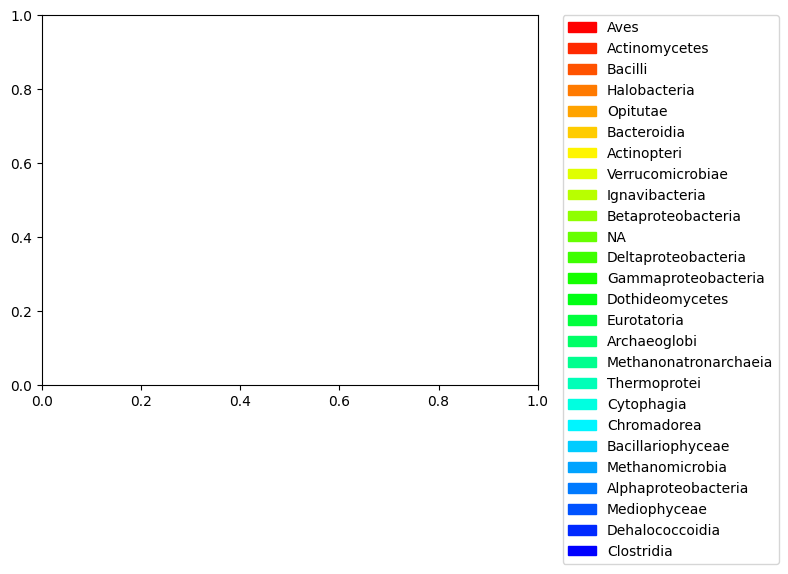

./examples/fsx1/27/
Index(['Unnamed: 0', 'Entry Name', 'Entry', 'Gene Names', 'Protein names',
       'Reviewed', 'Protein names.1', 'Organism', 'Taxonomic lineage (Ids)',
       'Sequence', 'query'],
      dtype='object')
0      2593542 (no rank), 194 (genus), 72294 (family)...
1      260714 (species), 194 (genus), 72294 (family),...
2      201 (species), 194 (genus), 72294 (family), 21...
3      2646778 (no rank), 265570 (genus), 2771472 (fa...
4      1752722 (phylum), 1794810 (no rank), 1783273 (...
                             ...                        
213    410657 (no rank), 408169 (no rank), 12908 (no ...
214    2593676 (no rank), 1883 (genus), 2062 (family)...
215    122706 (no rank), 28221 (class), 68525 (subphy...
216    93506 (no rank), 2157 (superkingdom), 131567 (...
217    1883 (genus), 2062 (family), 85011 (order), 17...
Name: Taxonomic lineage (Ids), Length: 218, dtype: object
0      {2593542 (no rank),  1224 (phylum),  72294 (fa...
1      {260714 (species),  1224 (ph

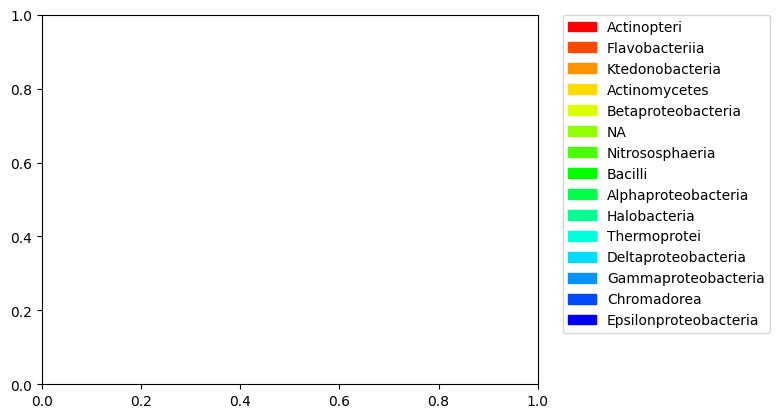

./examples/fsx1/39/
Index(['Unnamed: 0', 'Entry Name', 'Entry', 'Gene Names', 'Protein names',
       'Reviewed', 'Protein names.1', 'Organism', 'Taxonomic lineage (Ids)',
       'Sequence', 'query'],
      dtype='object')
0       292800 (species), 946234 (genus), 216572 (fami...
1       1126 (species), 1125 (genus), 1890449 (family)...
2       1126 (species), 1125 (genus), 1890449 (family)...
3       1126 (species), 1125 (genus), 1890449 (family)...
4       1938003 (genus), 2762317 (family), 768507 (ord...
                              ...                        
1851    351604 (species), 2910589 (genus), 213422 (fam...
1852    152260 (species), 1107 (genus), 1106 (family),...
1853    410657 (no rank), 408169 (no rank), 12908 (no ...
1854    410657 (no rank), 408169 (no rank), 12908 (no ...
1855    410657 (no rank), 408169 (no rank), 12908 (no ...
Name: Taxonomic lineage (Ids), Length: 1856, dtype: object
0       { 1783272 (no rank),  131567 (no rank),  1239 ...
1       { 1783272 (no 

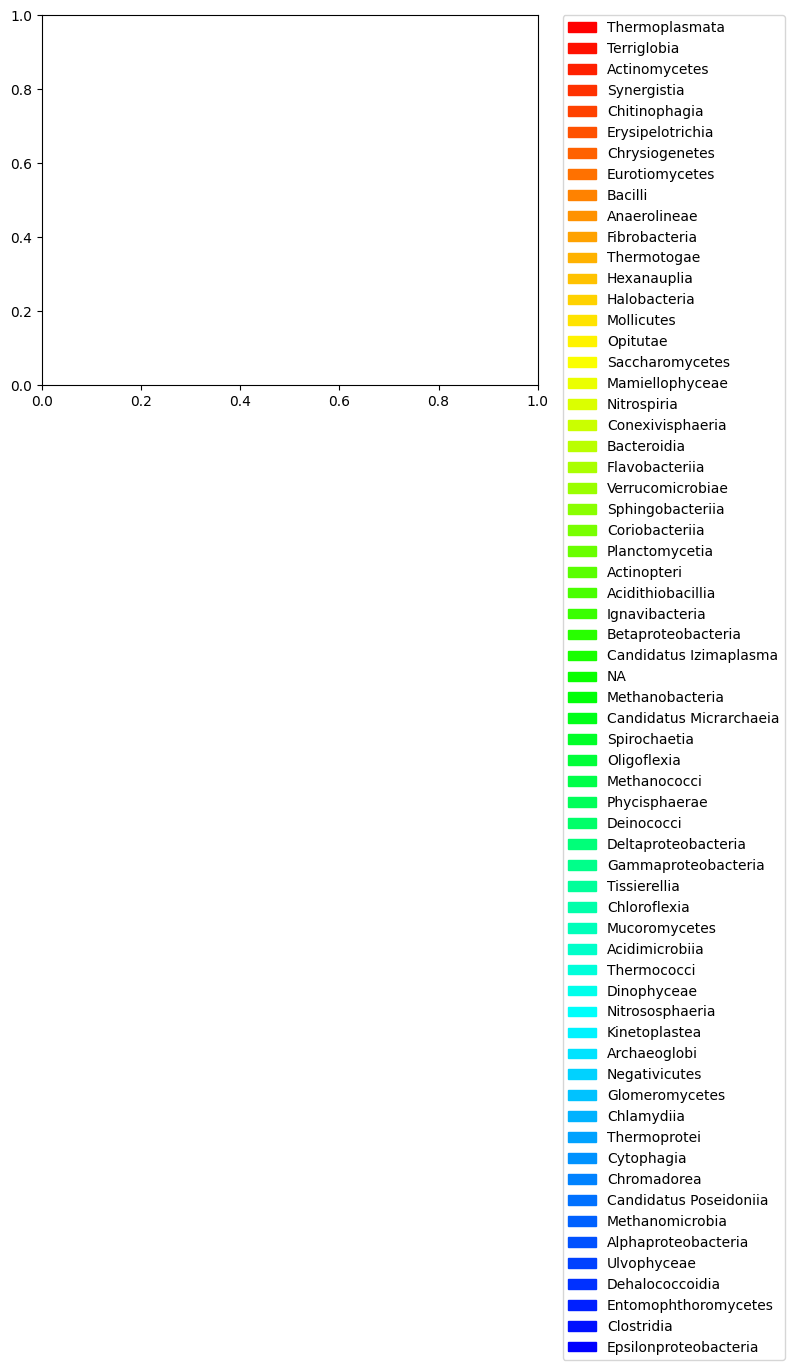

./examples/fsx1/38/
Index(['Unnamed: 0', 'Entry Name', 'Entry', 'Gene Names', 'Protein names',
       'Reviewed', 'Protein names.1', 'Organism', 'Taxonomic lineage (Ids)',
       'Sequence', 'query'],
      dtype='object')
0       1156500 (no rank), 1783234 (no rank), 2323 (no...
1       1156500 (no rank), 1783234 (no rank), 2323 (no...
2       1156500 (no rank), 1783234 (no rank), 2323 (no...
3       1156500 (no rank), 1783234 (no rank), 2323 (no...
4       1156500 (no rank), 1783234 (no rank), 2323 (no...
                              ...                        
3180    1655640 (no rank), 1655434 (phylum), 1935183 (...
3181    1655640 (no rank), 1655434 (phylum), 1935183 (...
3182    361607 (genus), 361606 (family), 588673 (order...
3183    37330 (species), 1817 (genus), 85025 (family),...
3184    410657 (no rank), 408169 (no rank), 12908 (no ...
Name: Taxonomic lineage (Ids), Length: 3185, dtype: object
0       {1156500 (no rank),  2323 (no rank),  131567 (...
1       {1156500 (no r

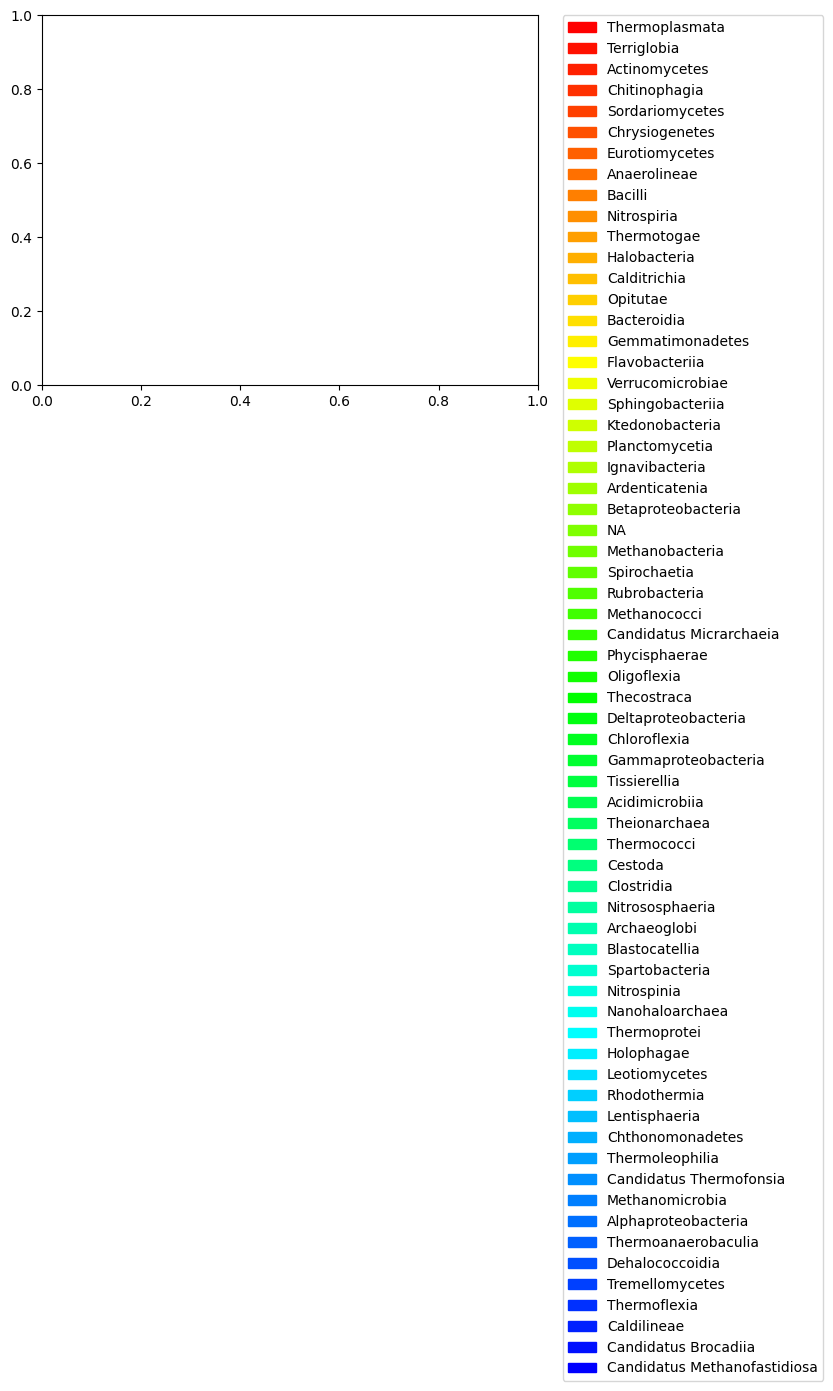

./examples/fsx1/26/
Index(['Unnamed: 0', 'Entry Name', 'Entry', 'Gene Names', 'Protein names',
       'Reviewed', 'Protein names.1', 'Organism', 'Taxonomic lineage (Ids)',
       'Sequence', 'query'],
      dtype='object')
0      2638319 (no rank), 52972 (genus), 80864 (famil...
1      410657 (no rank), 408169 (no rank), 12908 (no ...
2      1618330 (phylum), 1783234 (no rank), 2323 (no ...
3      1794839 (no rank), 1794810 (no rank), 1783273 ...
4      1752722 (phylum), 1794810 (no rank), 1783273 (...
                             ...                        
469    186928 (no rank), 186803 (family), 186802 (ord...
470    1490 (species), 1849822 (genus), 31979 (family...
471    1519 (species), 1485 (genus), 31979 (family), ...
472    410657 (no rank), 408169 (no rank), 12908 (no ...
473    139475 (genus), 565685 (tribe), 33370 (subfami...
Name: Taxonomic lineage (Ids), Length: 474, dtype: object
0      { 80840 (order),  28216 (class),  80864 (famil...
1      { 2787823 (no rank), 410657 

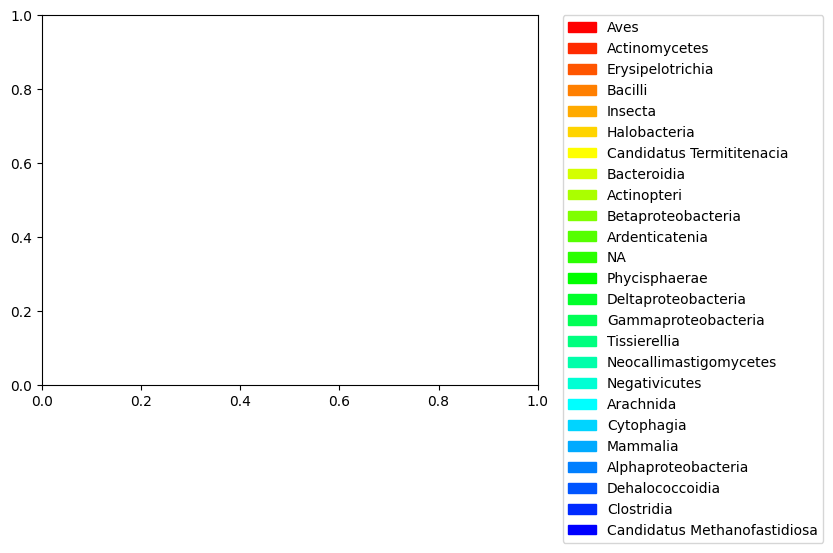

./examples/fsx1/30/
Index(['Unnamed: 0', 'Entry Name', 'Entry', 'Gene Names', 'Protein names',
       'Reviewed', 'Protein names.1', 'Organism', 'Taxonomic lineage (Ids)',
       'Sequence', 'query'],
      dtype='object')
0       38063 (no rank), 2235 (order), 183963 (class),...
1       2631116 (no rank), 145260 (genus), 2159 (famil...
2       7954 (genus), 2743711 (subfamily), 2743709 (fa...
3       39664 (species), 2175 (genus), 2206 (family), ...
4       2175 (genus), 2206 (family), 94695 (order), 22...
                              ...                        
4706    2212466 (no rank), 224464 (family), 224462 (su...
4707    1648508 (genus), 82115 (family), 356 (order), ...
4708    40324 (species), 995085 (no rank), 40323 (genu...
4709    108981 (species), 469 (genus), 468 (family), 2...
4710    2628915 (no rank), 84567 (genus), 84566 (famil...
Name: Taxonomic lineage (Ids), Length: 4711, dtype: object
0       { 2157 (superkingdom),  131567 (no rank),  229...
1       { 2157 (superk

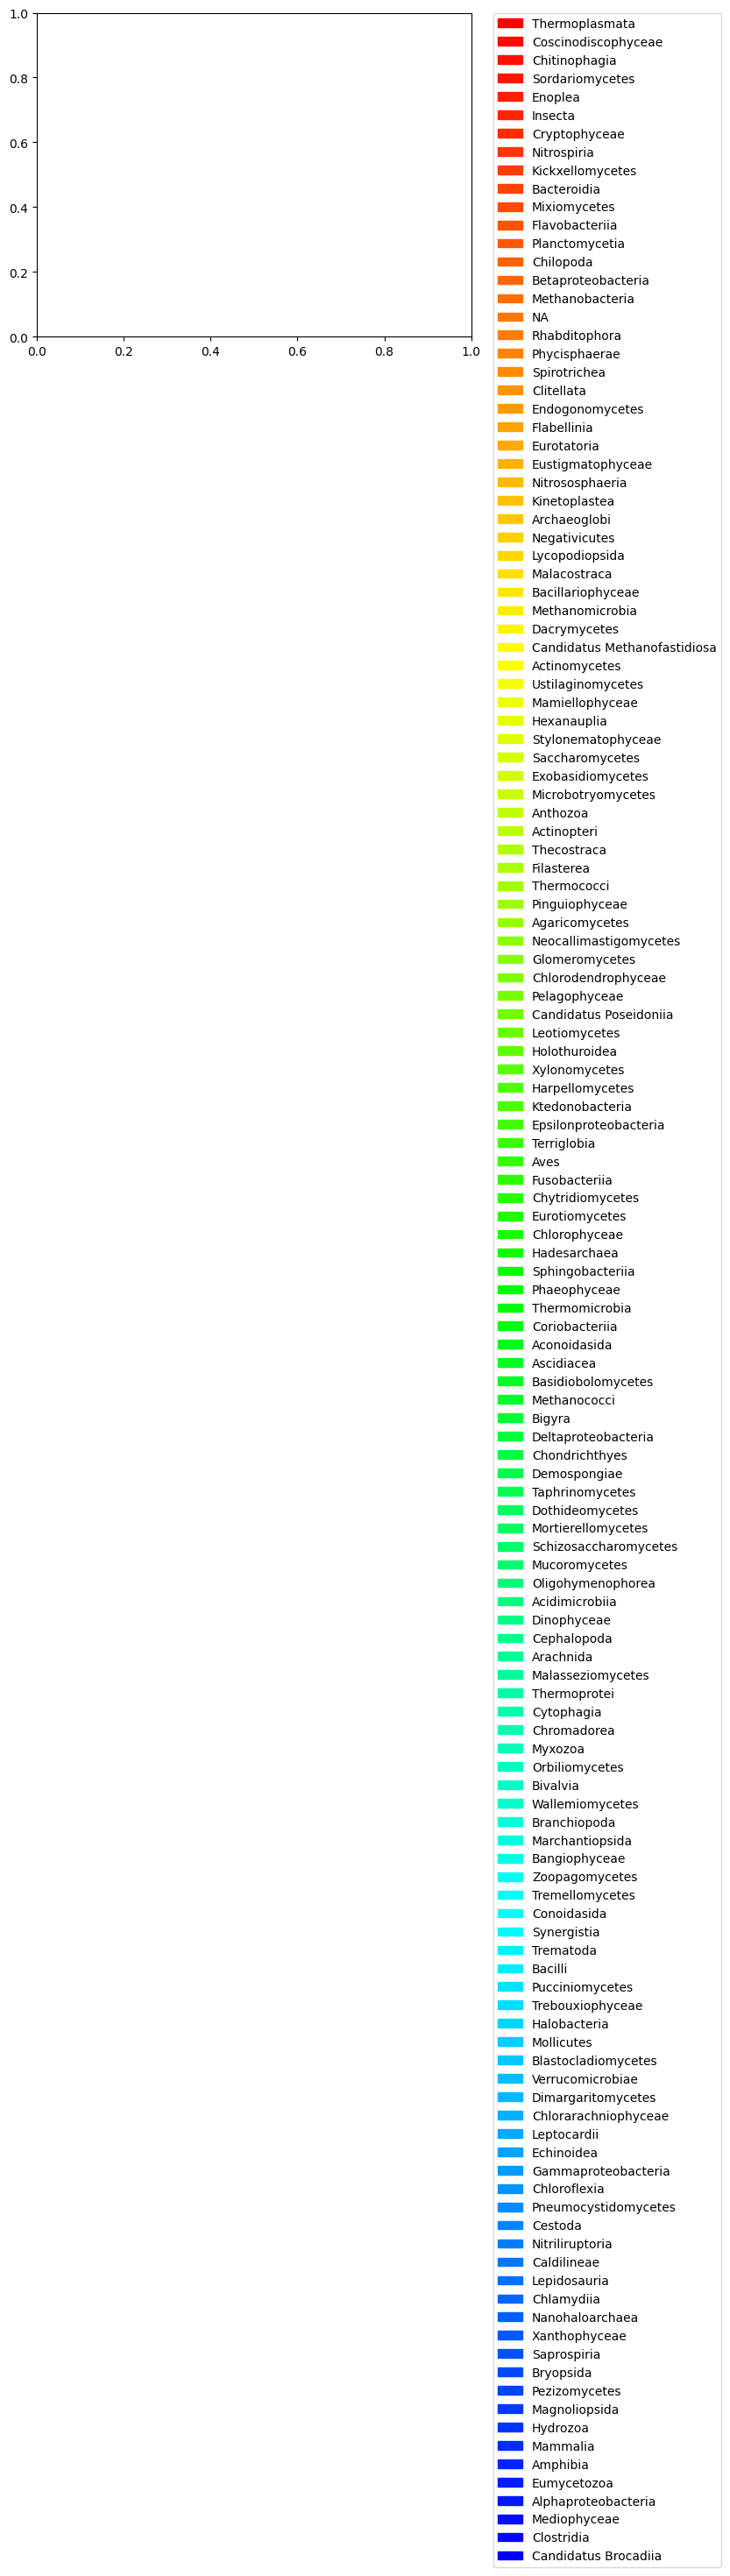

./examples/fsx1/1/
Index(['Unnamed: 0', 'Entry Name', 'Entry', 'Gene Names', 'Protein names',
       'Reviewed', 'Protein names.1', 'Organism', 'Taxonomic lineage (Ids)',
       'Sequence', 'query'],
      dtype='object')
0       862507 (subgenus), 10088 (genus), 39107 (subfa...
1       862507 (subgenus), 10088 (genus), 39107 (subfa...
2       9605 (genus), 207598 (subfamily), 9604 (family...
3       10114 (genus), 39107 (subfamily), 10066 (famil...
4       9605 (genus), 207598 (subfamily), 9604 (family...
                              ...                        
3584    562 (species), 561 (genus), 543 (family), 9134...
3585    629 (genus), 1903411 (family), 91347 (order), ...
3586    6237 (genus), 55885 (subfamily), 6243 (family)...
3587    6237 (genus), 55885 (subfamily), 6243 (family)...
3588    5782 (genus), 2058185 (family), 2058949 (order...
Name: Taxonomic lineage (Ids), Length: 3589, dtype: object
0       { 131567 (no rank),  117570 (no rank),  7711 (...
1       { 131567 (no ra

In [73]:
import pandas as pd
from ete3 import ncbi_taxonomy
import toytree
import colour
import sys
#create a legend for the colors using matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#make a list of the patches
import toyplot.svg

sys.path.append('./src/')
#drwa tree with a large figure size


for folder in folders:
    print(folder)

    seqdf = pd.read_csv(folder +'sequence_dataset.csv')
    print(seqdf.columns)
    print(seqdf['Taxonomic lineage (Ids)'])
    seqdf['linIDs'] = seqdf['Taxonomic lineage (Ids)'].map(lambda x : set( x.split(',') ) )
    print(seqdf.linIDs)
    seqdf['phylum'] = seqdf.linIDs.map(lambda x : [s.split()[0] for s in x if '(phylum)' in s]  )
    print(seqdf.phylum)
    seqdf['order'] = seqdf.linIDs.map(lambda x : [s.split()[0] for s in x if '(class)' in s]  )
    print(seqdf.order)

    ncbi = ncbi_taxonomy.NCBITaxa()

    translator = ncbi.get_taxid_translator([ o[0] for o in seqdf.order if len(o) > 0 ])
    seqdf['order_name'] = seqdf.order.map(lambda x : translator[int(x[0])] if len(x)> 0 else 'NA' )
    print(seqdf.order_name)
    print(translator)

    tre = toytree.tree(folder +'core_tree.nwk.PP.nwk.rooted')
    orderlabel = dict(zip(seqdf['Entry'],seqdf.Organism))
    tiplabels = [ l +' '+ orderlabel.get(l,l) for l in tre.get_tip_labels() ]
    #create a unique hex color for each order
    order_colors = colour.Color("red").range_to(colour.Color("blue"),len(set(seqdf['order_name'])))
    order_colors = { o : c.hex for o,c in zip(set(seqdf['order_name']),order_colors) }
    print(order_colors)
    #assign colors to each sequence in seqdf based on order
    seqdf['order_color'] = seqdf['order_name'].map(lambda x : order_colors[x] if x != 'NA' else '#000000' )
    print(seqdf['order_color'])
    cmapper = { l : c for l,c in zip(seqdf['Entry'],seqdf['order_color']) }
    colorvec = [ cmapper.get(l,'#000000') for l in tre.get_tip_labels() ]
    print(len(seqdf.Entry.unique()))
    print(len(tre.get_tip_labels()))
    print(len(colorvec))
    canvas, axes, mark = tre.draw(tip_labels=tiplabels, tip_labels_colors=colorvec, width=1500, height=5000 )
    toyplot.svg.render(canvas, folder  +"order_tree-plot.svg")
    patches = [ mpatches.Patch(color=c, label=l) for l,c in order_colors.items() ]
    #make a legend
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
    plt.savefig(folder+'tree_legend.svg', bbox_inches='tight')
    plt.show()
    


Index(['uniprot_id', 'dataset', 'genomic_accession', 'species', 'strain',
       'genomic_context', 'intergenic_distance', 'receptor_id',
       'grp_identical_proteins', 'rep_sequence', 'receptor_family', 'r_start',
       'r_end', 'r_strand', 'TPR_hmm_name', 'TPR_hmm_accession',
       'TPR_hmm_coverage', 'TPR_hmm_evalue', 'HTH_hmm_name',
       'HTH_hmm_accession', 'HTH_hmm_coverage', 'HTH_hmm_evalue',
       'homologous_ref_receptor', 'blastp_evalue', 'perc_identity',
       'perc_cover', 'propeptide_id', 'p_start', 'p_end', 'p_strand',
       'p_RBS_bin', 'p_RBS_motif', 'p_RBS_spacer', 'Prediction',
       'propeptide_score', 'SP(Sec/SPI)', 'TAT(Tat/SPI)', 'LIPO(Sec/SPII)',
       'OTHER', 'CS_Position', 'qss_id', 'genetic_element',
       'Phaster_prophage_prediction', 'prophage_region', 'taxid', 'lineage',
       'class', 'order', 'family', 'genus'],
      dtype='object')
receptor_family
{'subfam_14': '#f00', 'subfam_34': '#ff2100', 'subfam_21': '#ff4200', 'subfam_30': '#ff6300'

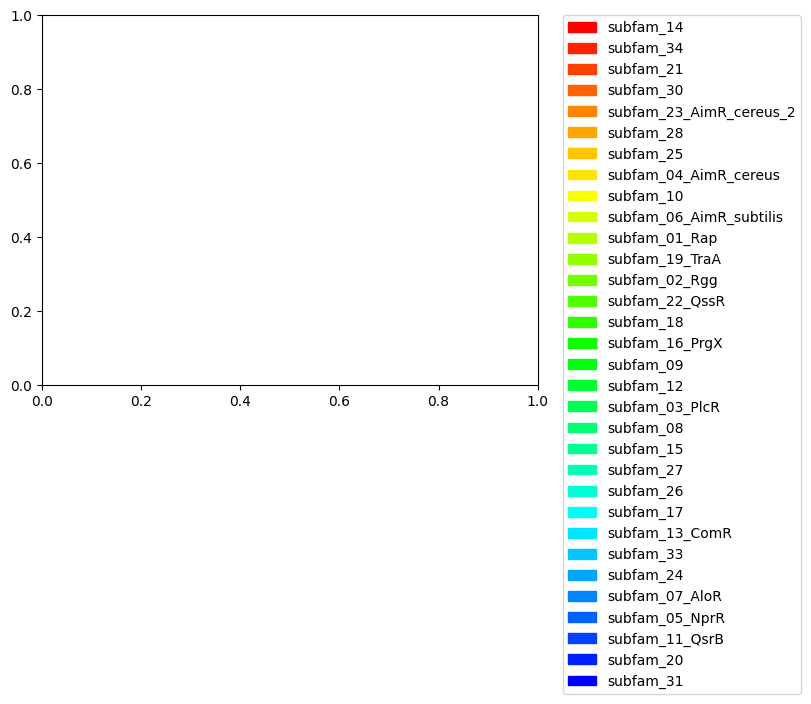

homologous_ref_receptor
{'NprR_[B._thuringensis]': '#f00', 'TraA_[E._faecalis_plasmid]': '#f50', nan: '#fa0', 'QssR5_[C._saccharoperbutylacetonicum]': '#ff0', 'AimR_[B._phage_phi3T]': '#af0', 'AimR-like_[B._phage_Waukesha]': '#5f0', 'PrgX_[E._faecalis_plasmid]': '#0f0', 'RopB_[S._pyogenes]': '#0f5', 'PlcR_[B._cereus]': '#0fa', 'AloR13_[P._polymyxa]': '#0ff', 'Rgg2_[S._pyogenes]': '#0af', 'RapA_[B._subtilis]': '#05f', 'QsrB_[C._acetobutylicum]': '#00f'}
0      #fa0
1      #05f
2      #05f
3      #05f
4      #05f
       ... 
857    #fa0
858    #fa0
859    #fa0
860    #fa0
861    #fa0
Name: order_color, Length: 862, dtype: object
770
770


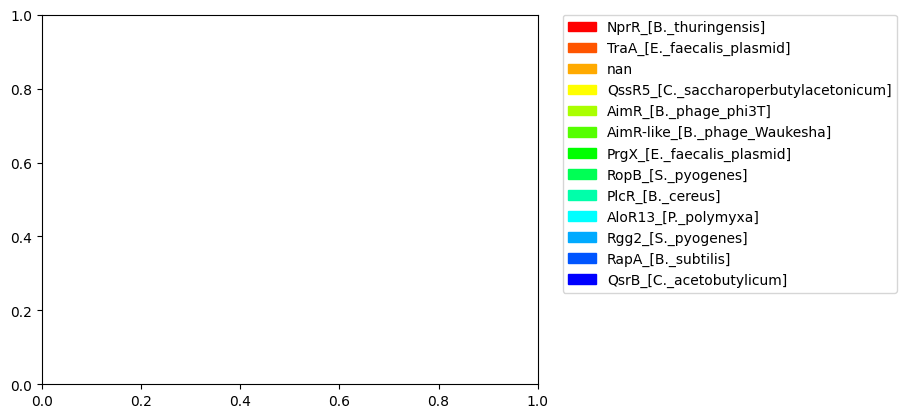

p_RBS_motif
{'AGAAGG': '#f00', nan: '#ff4e00', 'GGGGG': '#ff9d00', 'GAGG': '#ffeb00', 'AGGGGG': '#c4ff00', 'AGGAGG': '#76ff00', 'AGGA': '#27ff00', 'GGAG': '#00ff27', 'GGTGG': '#00ff76', 'AGGAG': '#00ffc4', 'GGCGG': '#00ebff', 'AGGTGG': '#009dff', 'GGAGG': '#004eff', 'AGTAGG': '#00f'}
0      #00ffc4
1      #00ffc4
2      #00ff27
3      #00ffc4
4      #00ffc4
        ...   
857    #ff4e00
858    #ff4e00
859    #ff4e00
860    #ff9d00
861    #ff4e00
Name: order_color, Length: 862, dtype: object
770
770


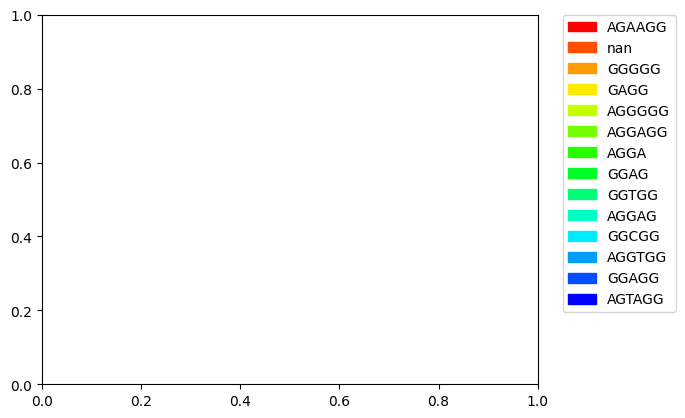

dataset
{'Firmicutes': '#f00', 'Viruses': '#00f'}
0      #f00
1      #f00
2      #f00
3      #f00
4      #f00
       ... 
857    #f00
858    #f00
859    #f00
860    #f00
861    #f00
Name: order_color, Length: 862, dtype: object
770
770


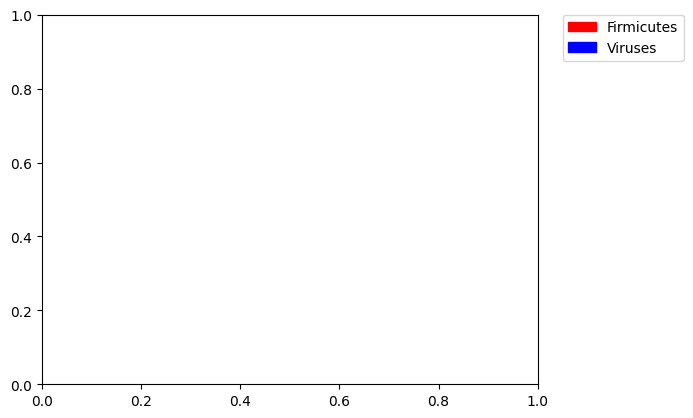

In [ ]:
folder = 'examples/RRNPP/round2/all/'
labels = pd.read_table('./examples/RRNPP/round2/metadata.tsv')
print(labels.columns)
labels_select = ['receptor_family'  , 'homologous_ref_receptor' , 'p_RBS_motif' ,'dataset'   ]

for l in labels_select:
        
    print(l)


    tre = toytree.tree(folder +'core_tree.nwk.PP.nwk.rooted')
    orderlabel = dict(zip(labels['uniprot_id'],labels[l]))
    tiplabels = [ str(l) +' '+ str(orderlabel.get(l,l) ) for l in tre.get_tip_labels() ]
    #create a unique hex color for each order


    order_colors = colour.Color("red").range_to(colour.Color("blue"),len(set(labels[l])))
    order_colors = { o : c.hex for o,c in zip(set(labels[l]),order_colors) }
    print(order_colors)
    #assign colors to each sequence in seqdf based on order
    labels['order_color'] = labels[l].map(lambda x : order_colors[x] if x != 'NA' else '#000000' )
    print(labels['order_color'])

    cmapper = { l : c for l,c in zip(labels['uniprot_id'],labels['order_color']) }
    colorvec = [ cmapper.get(l,'#000000') for l in tre.get_tip_labels() ]

    print(len(tre.get_tip_labels()))
    print(len(colorvec))

    canvas, axes, mark = tre.draw(tip_labels=tiplabels, tip_labels_colors=colorvec, width=1500, height=5000)
    patches = [ mpatches.Patch(color=c, label=l) for l,c in order_colors.items() ]
    toyplot.svg.render(canvas, folder  + l +"_tree-plot.svg")

    #make a legend
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
    plt.savefig(folder+ l +'_tree_legend.svg', bbox_inches='tight')
    plt.show()

In [ ]:
pip install skbio


ERROR: Could not find a version that satisfies the requirement skbio (from versions: none)
ERROR: No matching distribution found for skbio
Note: you may need to restart the kernel to use updated packages.


In [1]:
#grab identifiers
import ete3
import numpy as np
tree1 = ete3.Tree('./examples/RRNPP/round2/all/core_tree.nwk.PP.nwk.rooted', format=1)
#use ete3 to calculat distance matrix between leaves
m1 = np.zeros((len(tree1.get_leaves()), len(tree1.get_leaves())))
dist1 = tree1.get_distance(tree1.get_leaves()[0], tree1.get_leaves()[1])
for i, leaf1 in enumerate(tree1.get_leaves()):
    for j, leaf2 in enumerate(tree1.get_leaves()):
        if i == j:
            m1[i,j] = 0
        else:
            m1[i,j] = tree1.get_distance(leaf1, leaf2)



In [2]:
order = { l : i for i,l in enumerate(tree1.get_leaf_names()) }

In [3]:
import ete3
tree2 = ete3.Tree('./examples/RRNPP/round2/all/sequences.aln.fst.nwk', format=1)
#use ete3 to calculat distance matrix between leaves
m2 = np.zeros((len(tree1.get_leaves()), len(tree1.get_leaves())))
for i, leaf1 in enumerate(tree1.get_leaves()):
    for j, leaf2 in enumerate(tree1.get_leaves()):
        if leaf1.name in order and leaf2.name in order:
            if i == j:
                m2[order[leaf1.name],order[leaf2.name]] = 0
            else:
                m2[order[leaf1.name],order[leaf2.name]] = tree2.get_distance(leaf1, leaf2)


AttributeError: module 'matplotlib' has no attribute 'show'

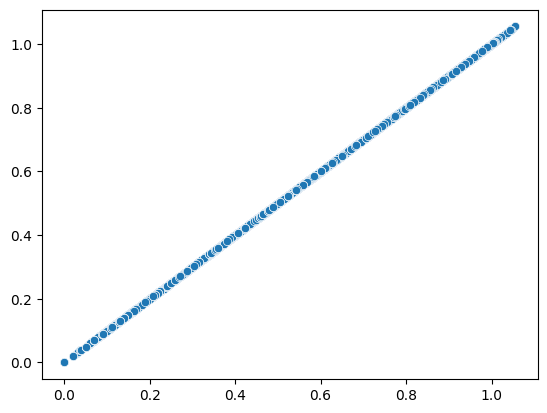

In [5]:
#grab identifiers
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot( x = m1.flatten(), y = m2.flatten())
plt.show()        

    